In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Завантаження даних

In [2]:
df = pd.read_excel('data\\data_lab1.xlsx', sheet_name='2,18', index_col=0)

df.dropna(inplace=True)

df

,t36,t35,t34,t33,t32
Диурез,,,,,
1,50,50,60,80,130
2,45,45,60,85,150
3,45,45,60,80,150
4,50,50,55,90,200
5,50,50,55,85,110
6,50,40,60,85,120
7,45,50,55,80,120
8,45,50,55,90,130
9,50,55,60,85,150


In [3]:
data = df.copy()
#вибір ознак
data = data[['t36','t35','t34','t33','t32']]
#стандартизація даних
X_st = (data - data.mean()) / data.std(ddof=1)
data

,t36,t35,t34,t33,t32
Диурез,,,,,
1,50,50,60,80,130
2,45,45,60,85,150
3,45,45,60,80,150
4,50,50,55,90,200
5,50,50,55,85,110
6,50,40,60,85,120
7,45,50,55,80,120
8,45,50,55,90,130
9,50,55,60,85,150


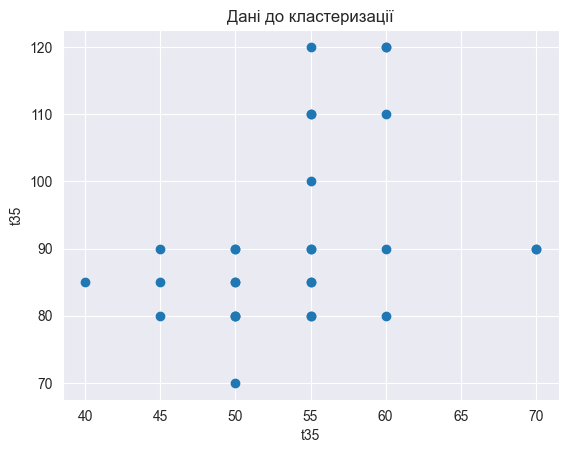

<Axes: >

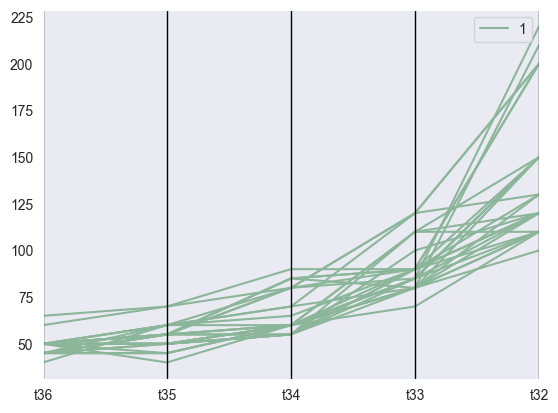

In [4]:
df['y_kmeans'] = 1
# Візуалізація даних до кластеризації
plt.scatter(df["t35"],df["t33"], label='До кластеризації')
plt.xlabel('t35')
plt.ylabel('t35')
plt.title('Дані до кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns)

In [5]:
# кластеризація  даних  методом k-середніх  на  задану  користувачем  кількість кластерів
kmeans = KMeans(n_clusters=2, init="random", n_init=10)
kmeans.fit(data)
df['y_kmeans'] = kmeans.labels_
print(kmeans.labels_)

[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1]


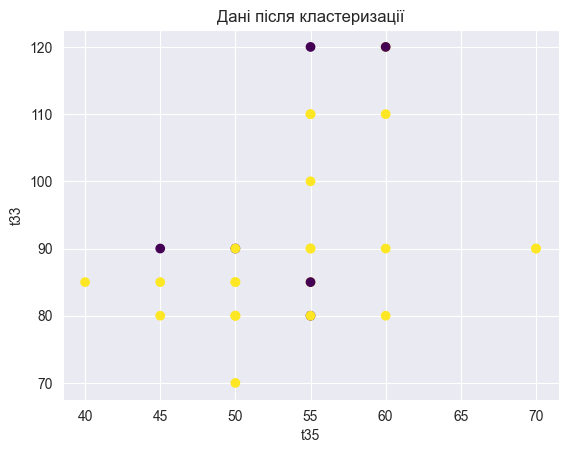

<Axes: >

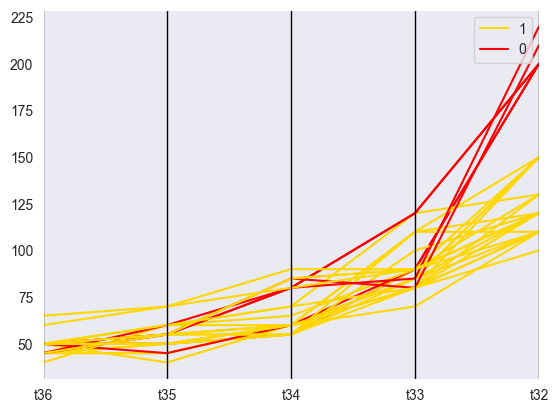

In [6]:

# Візуалізація даних після кластеризації
plt.scatter(df["t35"],df["t33"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t35')
plt.ylabel('t33')
plt.title('Дані після кластеризації')
plt.show()

colors = ('gold', 'red', 'blue', 'green','hotpink')
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)

C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

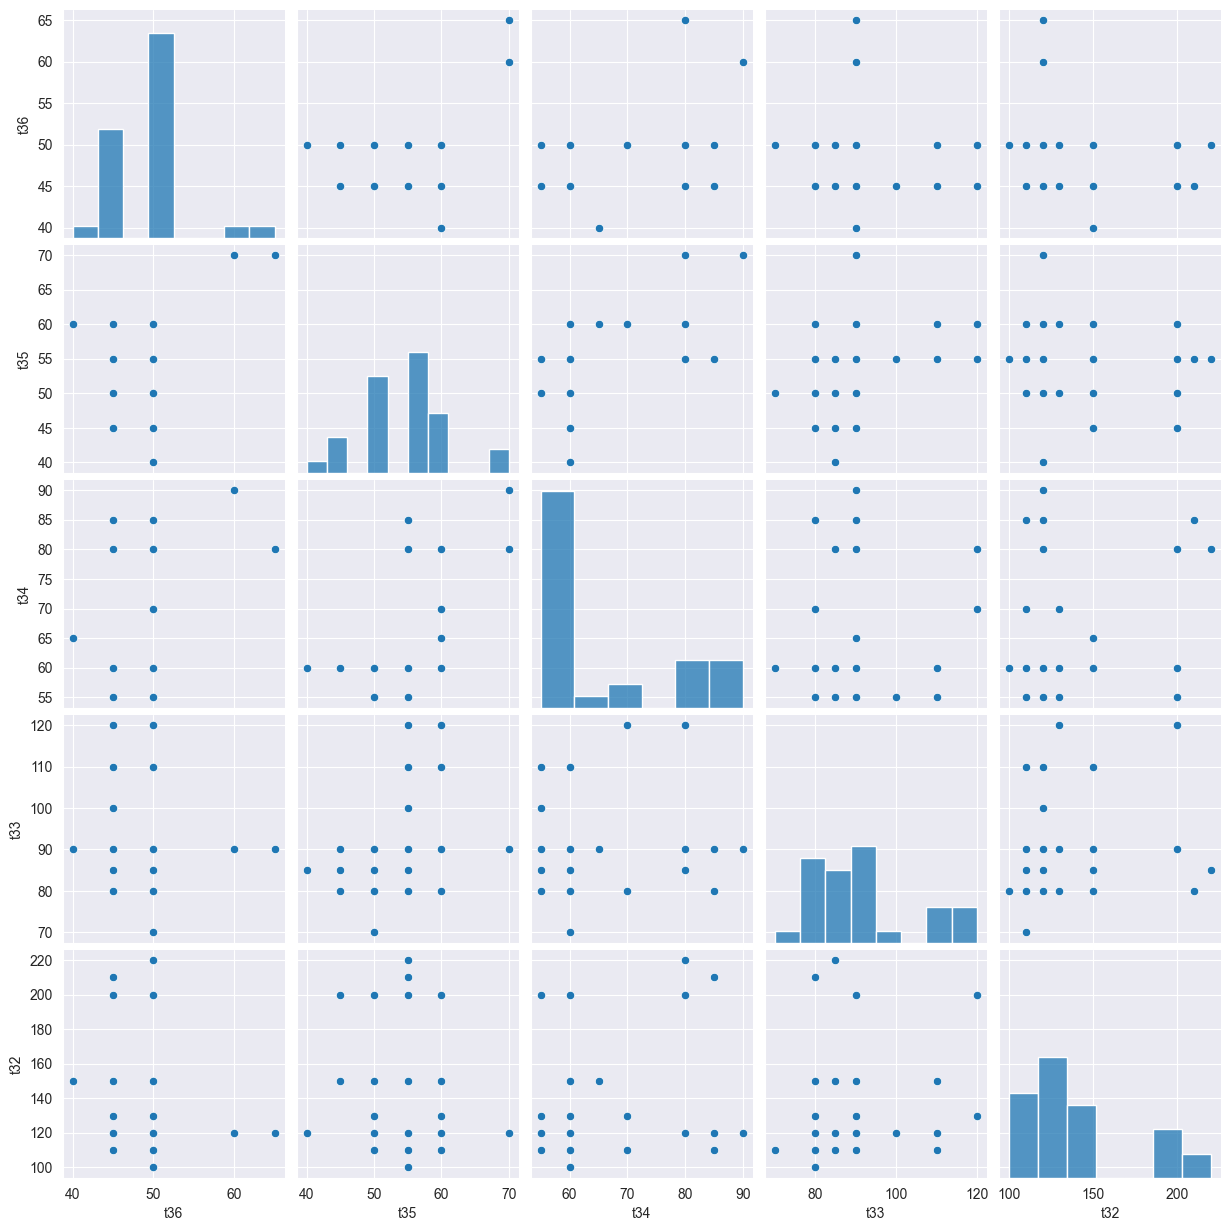

In [7]:
sns.pairplot(data)

In [8]:
# sns.pairplot(df, hue='y_kmeans', vars=X.columns, palette=dict(zip(df['y_kmeans'].unique(), colors[:df['y_kmeans'].nunique()])))

## Оцінювання  оптимальної  кількості  кластерів  на  основі  одного  з  індексів  якості кластеризації;  результати  оцінювання  подати  у  табличному  та  графічному вигляді; 

### Індекс Калінскі-Харабас

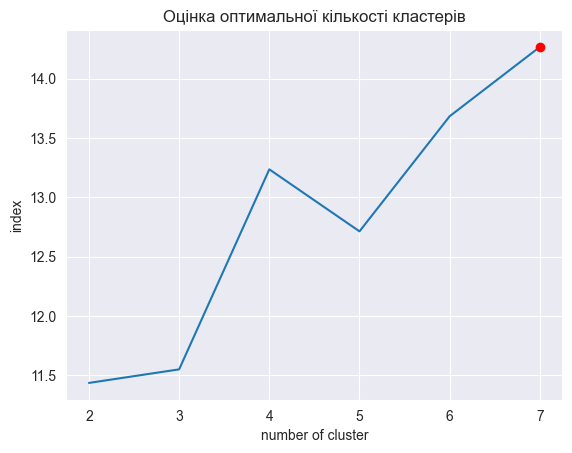

In [9]:
indices = []
k_range = range(2, 8)
for k in k_range:
    cluster_labels  = KMeans(n_clusters=k, n_init=10).fit_predict(X_st)
    indices.append(calinski_harabasz_score(X_st,cluster_labels ))
plt.plot(k_range,indices)
arg = np.argmax(indices)
plt.plot(k_range[arg], indices[arg], marker='o', color='red')
plt.xlabel('number of cluster')
plt.ylabel('index')
plt.title('Оцінка оптимальної кількості кластерів')

optimal_num_clusters = k_range[np.argmax(indices)]


In [10]:
# Запуск k-середніх з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10)
kmeans.fit(data)
df['y_kmeans'] = kmeans.labels_


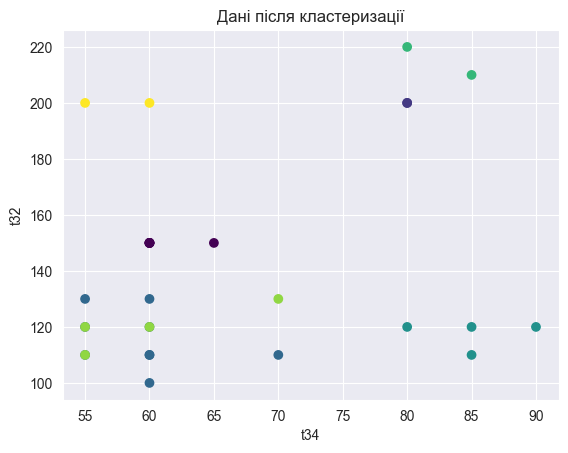

<Axes: >

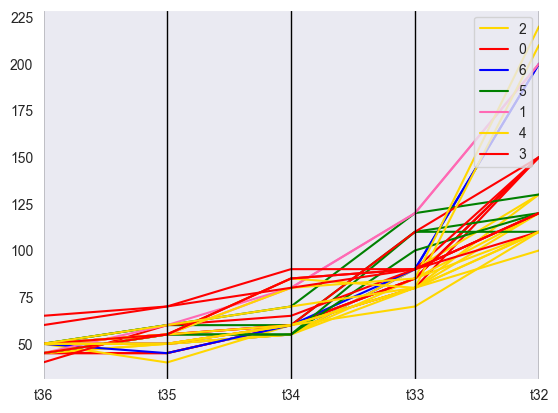

In [11]:
# Візуалізація даних після кластеризації
plt.scatter(df["t34"],df["t32"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t34')
plt.ylabel('t32')
plt.title('Дані після кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)

### Індекс силуету

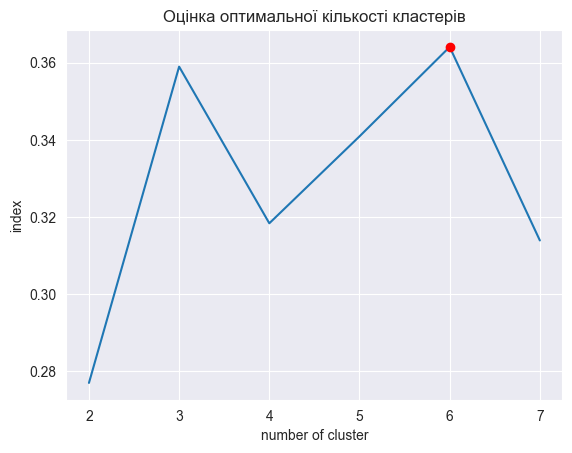

In [12]:
indices = []
k_range = range(2, 8)
for k in k_range:
    cluster_labels  = KMeans(n_clusters=k, n_init=10).fit_predict(X_st)
    indices.append(silhouette_score(X_st,cluster_labels ))
plt.plot(k_range,indices)
arg = np.argmax(indices)
plt.plot(k_range[arg], indices[arg], marker='o', color='red')
plt.xlabel('number of cluster')
plt.ylabel('index')
plt.title('Оцінка оптимальної кількості кластерів')

optimal_num_clusters = k_range[np.argmax(indices)]

In [13]:
# Запуск k-середніх з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10)
kmeans.fit(data)
df['y_kmeans'] = kmeans.labels_

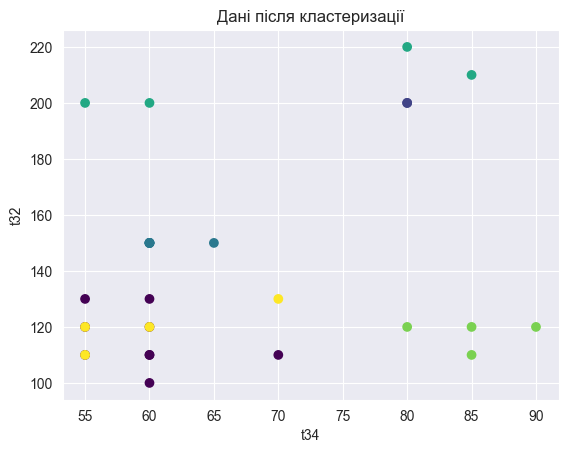

<Axes: >

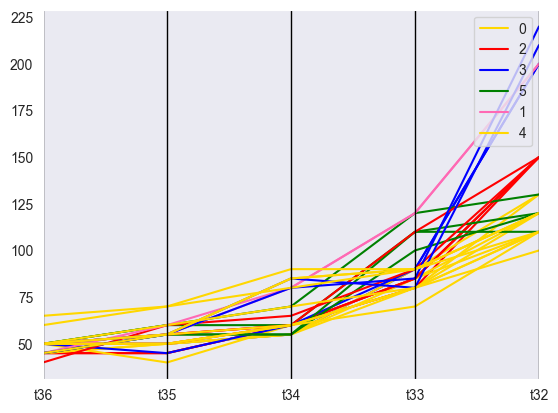

In [14]:
# Візуалізація даних після кластеризації
plt.scatter(df["t34"],df["t32"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t34')
plt.ylabel('t32')
plt.title('Дані після кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)

### Індекс Девіс-Болдуін

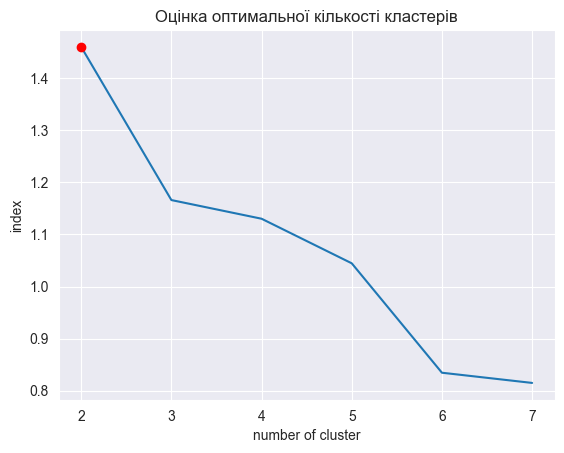

In [15]:
indices = []
k_range = range(2, 8)
for k in k_range:
    cluster_labels  = KMeans(n_clusters=k, n_init=10).fit_predict(X_st)
    indices.append(davies_bouldin_score(X_st,cluster_labels ))
plt.plot(k_range,indices)
arg = np.argmax(indices)
plt.plot(k_range[arg], indices[arg], marker='o', color='red')
plt.xlabel('number of cluster')
plt.ylabel('index')
plt.title('Оцінка оптимальної кількості кластерів')

optimal_num_clusters = k_range[np.argmax(indices)]

In [16]:
# Запуск k-середніх з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10)
kmeans.fit(data)
df['y_kmeans'] = kmeans.labels_

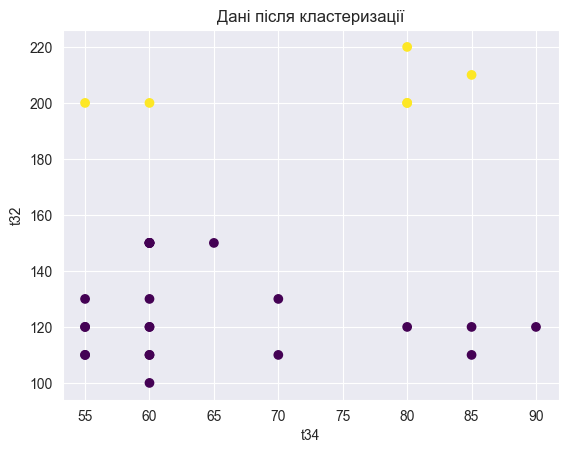

<Axes: >

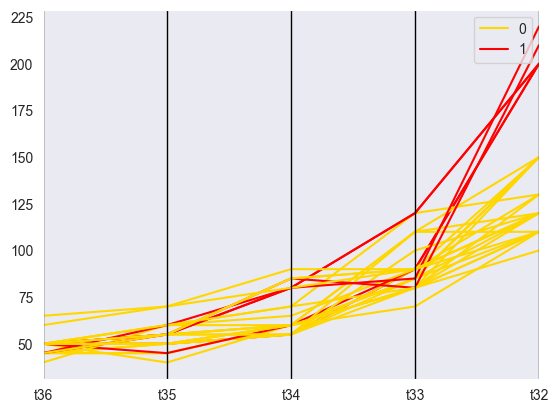

In [17]:
# Візуалізація даних після кластеризації
plt.scatter(df["t34"],df["t32"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t34')
plt.ylabel('t32')
plt.title('Дані після кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)

## Висновок

Краще за все, на мою думку, показав себе індекс Девіс-Болдуін, так як  з фізичної точки зору можна виділити наступні 2 групи пацієнтів:
 <ul>
    <li> Невелике підвищення диурезу </li>
    <li> Різке підвищення диурезу </li>
</ul>


## Розрахунок середнього арифметичного та середньоквадратичного відхилення для кожного виділеного кластеру. 

In [18]:
cluster_stats = df.groupby('y_kmeans').agg({'t36': ['mean', 'std'],
                                             't35': ['mean', 'std'],
                                             't34': ['mean', 'std'],
                                             't33': ['mean', 'std'],
                                             't32': ['mean', 'std']})

print(cluster_stats)

                t36                  t35                  t34             \
               mean       std       mean       std       mean        std   
y_kmeans                                                                   
0         49.130435  5.146087  54.130435  7.175111  64.347826  10.585619   
1         48.333333  2.581989  53.333333  5.163978  73.333333  12.516656   

                t33                    t32             
               mean        std        mean        std  
y_kmeans                                               
0         89.782609  12.291743  125.652174  16.466519  
1         97.500000  17.818530  205.000000   8.366600  


## Власний метод k-середніх

In [19]:
def initialize_centers(X, n_clusters):
    # Ініціалізація початкових центрів за допомогою k-means++
    centers = [X[np.random.randint(X.shape[0])]]
    for _ in range(1, n_clusters):
        distances = np.linalg.norm(X - centers[-1], axis=1)
        probs = distances / np.sum(distances)
        new_center = X[np.random.choice(X.shape[0], p=probs)]
        centers.append(new_center)
    return np.array(centers)

def assign_points_to_clusters(X, centers):
    # Призначення точок до кластерів
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

def update_centers(X, labels, n_clusters):
    # Оновлення центрів кластерів
    new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    return new_centers

def calculate_inertia(X, centers, labels):
    # Розрахунок інерції
    inertia = np.sum((X - centers[labels]) ** 2)
    return inertia


def my_kmeans(X, n_clusters, n_init=10, max_iters=100):
    best_labels = None
    best_centers = None
    best_inertia = float('inf')
    
    for _ in range(n_init):
        # Ініціалізація початкових центрів за допомогою k-means++
        centers = initialize_centers(X, n_clusters)
        labels = None
        eps = 1e-4
        
        for _ in range(max_iters):
            
            # Призначення точок до кластерів
            labels = assign_points_to_clusters(X, centers)
            
            # Оновлення центрів
            new_centers = update_centers(X, labels, n_clusters)
            
            # Перевірка на збіжність
            if np.all(np.abs(new_centers - centers) <= eps):
                break
            
            centers = new_centers
        
        # Розрахунок інерції (сума квадратів відстаней до центрів)
        inertia = calculate_inertia(X, centers, labels)
        
        # Порівняння з найкращим результатом
        if inertia < best_inertia:
            best_labels = labels
            best_centers = centers
            best_inertia = inertia
    
    return  best_labels,best_centers



In [20]:
test_df = pd.read_csv('data\\data_lab1_змодельовані\\9.txt', delimiter='\t', header=None)

test_df[['col1', 'col2']] = test_df[0].str.split(expand=True)

test_df = test_df.drop(columns=[0])

test_df['col1'] = test_df['col1'].astype(float)
test_df['col2'] = test_df['col2'].astype(float)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    200 non-null    float64
 1   col2    200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [21]:
X_test = test_df.copy()
test_df['y_kmeans'] = 1

[0 1 0 0 2 1 1 0 2 1 2 1 2 1 1 0 0 0 0 2 1 1 0 0 2 0 0 0 0 1 0 1 2 1 0 0 1
 0 1 0 0 0 2 2 1 1 2 1 2 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 2 0 2 1 0 0
 2 1 2 1 0 0 2 0 2 1 0 2 1 2 0 1 2 2 0 2 0 1 0 1 0 1 1 1 0 2 2 1 1 2 1 0 1
 0 1 1 1 0 1 1 2 1 1 1 0 0 2 0 2 1 0 2 1 1 2 2 0 1 1 0 1 2 1 1 2 2 2 1 2 2
 0 2 2 2 2 0 1 2 1 2 2 0 1 0 1 2 0 0 0 1 2 0 2 1 1 1 2 0 1 1 1 2 1 0 2 1 1
 1 2 1 1 0 0 0 1 0 2 2 1 0 1 2]


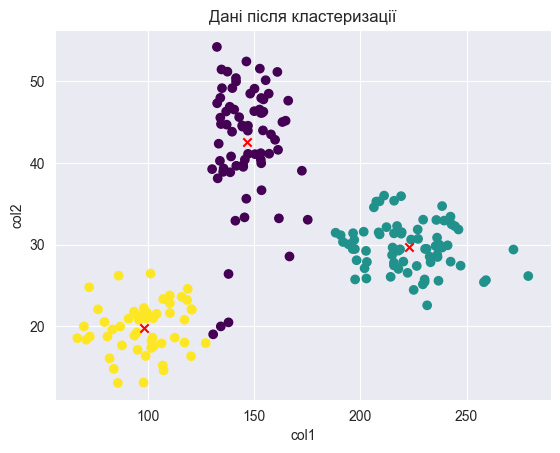

<Axes: >

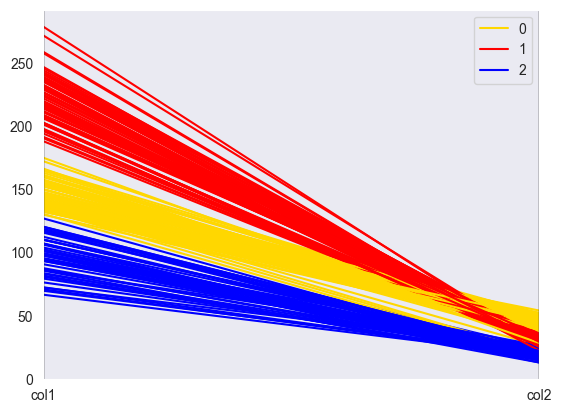

In [22]:
labels,centers  = my_kmeans(X_test.values, 3)
print(labels)
test_df['y_kmeans'] = labels

# Візуалізація даних після кластеризації
plt.scatter(test_df['col1'],test_df['col2'], c=test_df['y_kmeans'],cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', marker='x', label='Центроїди')
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Дані після кластеризації')
plt.show()

pd.plotting.parallel_coordinates(test_df, 'y_kmeans', cols=X_test.columns, color=colors)

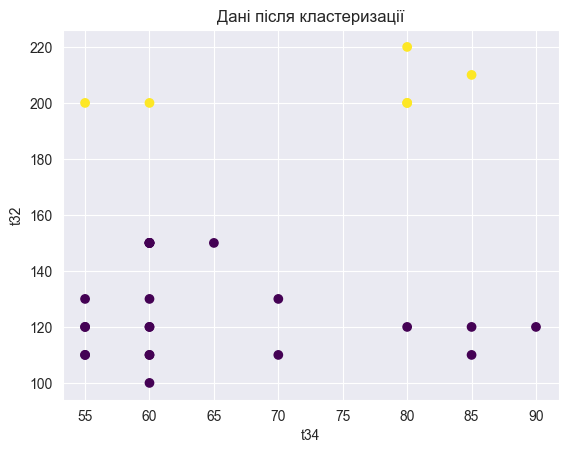

<Axes: >

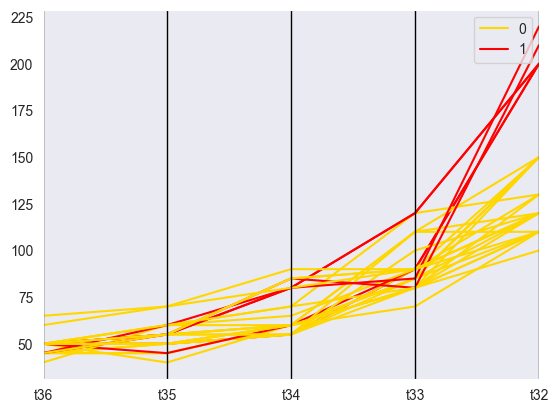

In [23]:
labels,centers = my_kmeans(data.values, 2)

df['y_kmeans'] = labels

# Візуалізація даних після кластеризації
plt.scatter(df["t34"],df["t32"], c=df['y_kmeans'],cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='r', marker='x', label='Центроїди')
plt.xlabel('t34')
plt.ylabel('t32')
plt.title('Дані після кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)

# Лаб 2

In [24]:
agglo =  AgglomerativeClustering(n_clusters=2, linkage="average")
agglo.fit(X_test)
test_df['y_agglo'] = agglo.labels_
print(test_df)

         col1     col2  y_kmeans  y_agglo
0    135.6176  39.3134         0        0
1    222.2470  26.5338         1        1
2    152.5396  46.5317         0        0
3    175.2222  33.0348         0        0
4    110.2923  23.7602         2        0
..        ...      ...       ...      ...
195   69.8322  19.9665         2        0
196  231.1744  29.4693         1        1
197  134.8455  49.1486         0        0
198  206.3709  34.5523         1        1
199   70.9539  18.3390         2        0

[200 rows x 4 columns]


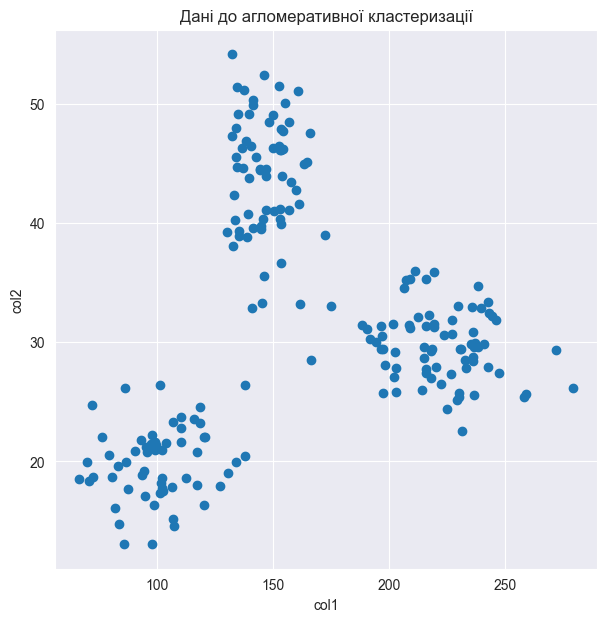

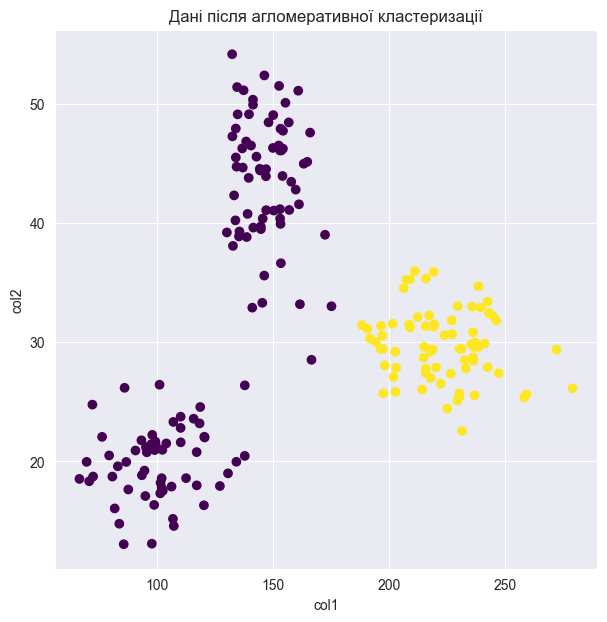

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(test_df['col1'],test_df['col2'])
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Дані до агломеративної кластеризації')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(test_df['col1'],test_df['col2'], c=test_df['y_agglo'],cmap='viridis')
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Дані після агломеративної кластеризації')
plt.show()

[[1.70000000e+02 1.94000000e+02 1.52332597e-01 2.00000000e+00]
 [1.02000000e+02 1.81000000e+02 1.98062743e-01 2.00000000e+00]
 [7.00000000e+00 5.70000000e+01 2.31548807e-01 2.00000000e+00]
 [1.10000000e+01 8.30000000e+01 2.84978683e-01 2.00000000e+00]
 [7.50000000e+01 8.90000000e+01 2.89914487e-01 2.00000000e+00]
 [1.57000000e+02 1.86000000e+02 3.00325157e-01 2.00000000e+00]
 [1.40000000e+01 1.12000000e+02 3.04805594e-01 2.00000000e+00]
 [6.40000000e+01 1.67000000e+02 3.34663114e-01 2.00000000e+00]
 [1.70000000e+01 1.09000000e+02 4.24674110e-01 2.00000000e+00]
 [0.00000000e+00 1.75000000e+02 4.67963802e-01 2.00000000e+00]
 [2.30000000e+01 9.80000000e+01 4.87231382e-01 2.00000000e+00]
 [8.60000000e+01 1.30000000e+02 5.14463021e-01 2.00000000e+00]
 [2.40000000e+01 1.82000000e+02 5.45602832e-01 2.00000000e+00]
 [1.47000000e+02 1.68000000e+02 5.81213704e-01 2.00000000e+00]
 [1.30000000e+01 5.10000000e+01 5.89422098e-01 2.00000000e+00]
 [6.20000000e+01 1.64000000e+02 5.96926738e-01 2.000000

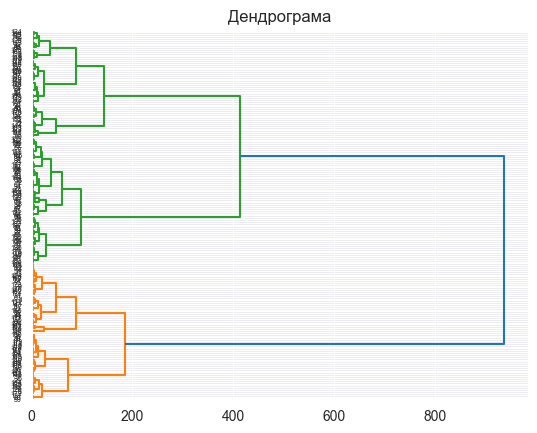

In [26]:
linkage_matrix = linkage(X_test, method='ward')  
dendrogram(linkage_matrix, orientation="right")
plt.title('Дендрограма')
plt.show()

Візуально проаналізувавши дендрограму, я можу зробити висновок, що оптимальною кількість кластерів буде ...

In [27]:
#Стандартизація даних 
X_test_st = (X_test - X_test.mean()) / X_test.std(ddof=1)

## Оцінювання  оптимальної  кількості  кластерів  у  випадку застосування методу агломеративної ієрархічної кластеризації. 

### Середній коефіціент силуету 

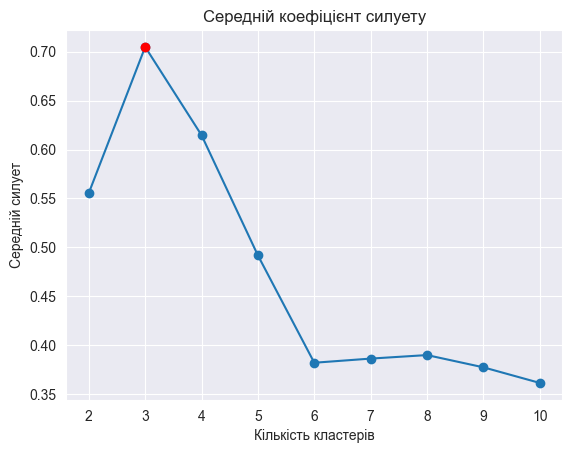

In [28]:
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:  
    cluster_labels  = AgglomerativeClustering(n_clusters=k).fit_predict(X_test_st)
    silhouette_scores.append(silhouette_score(X_test_st, cluster_labels))

plt.plot(k_range, silhouette_scores, marker='o')
arg = np.argmax(silhouette_scores)
plt.plot(k_range[arg], silhouette_scores[arg], marker='o', color='red')
plt.xlabel("Кількість кластерів")
plt.ylabel("Середній силует")
plt.title("Середній коефіцієнт силуету")
plt.show()

## Порівняння розбиттів, одержаних різними методами, на основі Rand index.

In [29]:
k_means_labels = KMeans(n_clusters=4, n_init=10).fit_predict(X_test)
agglo_labels = AgglomerativeClustering(n_clusters=4).fit_predict(X_test)

rand_score = adjusted_rand_score(k_means_labels, agglo_labels)

print("Adjusted Rand Index між розбиттям K-means та розбиттям Agglomerative Clusstering:", rand_score)

Adjusted Rand Index між розбиттям K-means та розбиттям Agglomerative Clusstering: 0.9186560684818524


## Власна агломеративна ієрархічна кластеризація